🔹 1. Nguyên lý hoạt động (không công thức nặng!)
🎯 Mục tiêu:
Tìm biên phân cách tốt nhất giữa các lớp — không chỉ phân tách đúng, mà còn cách xa cả hai lớp nhất có thể.

🧠 Ý tưởng chính — “An toàn là trên hết!”
Thay vì chỉ vẽ một đường chia đúng, SVM tìm đường chia có "khoảng đệm" (margin) rộng nhất. 

Support vectors: Các điểm gần biên nhất — chúng "hỗ trợ" xác định vị trí biên.
Margin: Khoảng cách từ biên đến support vectors → càng rộng càng tốt.
🔍 Trực quan:
Giả sử bạn có 2 lớp: ● (xanh) và ▲ (đỏ).

Nhiều đường có thể chia đúng.
Nhưng SVM chọn đường ở giữa, sao cho khoảng trống 2 bên là lớn nhất.
→ Điều này giúp tổng quát tốt hơn trên dữ liệu mới.
💡 Xử lý dữ liệu không phân tách tuyến tính?
Dùng kernel trick (mẹo kernel):
→ Ánh xạ dữ liệu lên không gian chiều cao hơn, nơi nó trở nên phân tách được.
Các kernel phổ biến:
Linear: cho dữ liệu gần tuyến tính.
RBF (Gaussian): cho dữ liệu phi tuyến phức tạp (mặc định trong sklearn).
Polynomial: cho quan hệ đa thức.
🌟 Không cần hiểu ánh xạ chi tiết!
Chỉ cần nhớ: Kernel giúp SVM xử lý phi tuyến mà không cần tính toán phức tạp. 

✅ Ưu điểm:
Hiệu quả cao với dữ liệu có nhiều đặc trưng (text, gene...).
Ít overfit nhờ tối đa hóa margin.
Linh hoạt nhờ kernel.
❌ Hạn chế:
Chậm với dữ liệu lớn (độ phức tạp ~O(n²) đến O(n³)).
Không cho xác suất mặc định (phải bật tính năng riêng).
Khó tinh chỉnh: cần chọn kernel, C, gamma...
Cần chuẩn hóa dữ liệu (vì dựa trên khoảng cách!).
❗ SVM đầy đủ (với kernel) cực kỳ phức tạp để cài từ đầu — cần giải bài toán tối ưu bậc hai (quadratic programming), dùng Lagrange multipliers, kernel matrix, v.v. 
 3. Khi nào dùng SVM?
Dữ liệu
nhỏ đến trung bình
(< 10k mẫu)
Dữ liệu
rất lớn
→ quá chậm
Số đặc trưng
cao
(text, gene, ảnh vectorized)
Cần
dự đoán cực nhanh
(real-time)
Mối quan hệ
phi tuyến
nhưng không quá phức tạp (dùng RBF kernel)
Dữ liệu
chưa chuẩn hóa
Bạn cần
biên phân cách rõ ràng, ổn định
Cần
xác suất đầu ra đáng tin cậy
(SVM không phải lựa chọn đầu)
Làm
baseline mạnh
cho bài toán phân loại nhỏ
Bài toán
đa lớp rất lớn
(SVM xử lý đa lớp bằng one-vs-one → chậm)



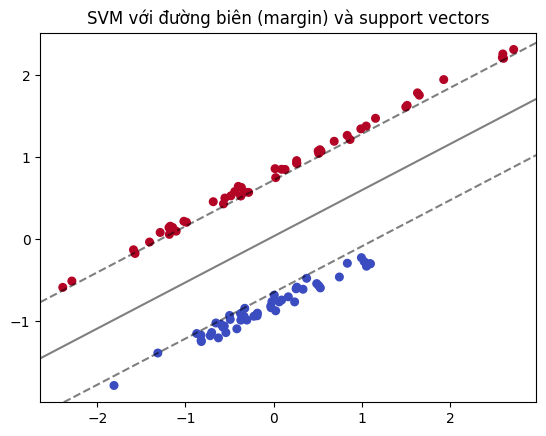

✅ Support vectors: 4 điểm


In [1]:
# ⚠️ CẢNH BÁO: Đây là phiên bản RẤT ĐƠN GIẢN, KHÔNG DÙNG TRONG THỰC TẾ!
# Chỉ để minh họa: SVM tìm siêu phẳng w·x + b = 0 sao cho margin lớn nhất.

import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Tạo dữ liệu 2D nhị phân
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)  # Chuyển nhãn sang -1 và +1

# Chuẩn hóa (SVM rất nhạy!)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# --- DÙNG SKLEARN ĐỂ MINH HỌA (vì cài tay quá phức tạp) ---
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)

# Vẽ kết quả
def plot_svm_decision_boundary(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
    
    # Vẽ đường biên quyết định
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title("SVM với đường biên (margin) và support vectors")
    plt.show()

plot_svm_decision_boundary(svm_model, X, y)
print("✅ Support vectors:", svm_model.support_vectors_.shape[0], "điểm")